In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Linear Regression_2.txt',names=['size','bedrooms','price'])
data_2=data
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
def normalize_feature(data):
    return (data-data.mean())/data.std()

In [4]:
data=normalize_feature(data)

In [5]:
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


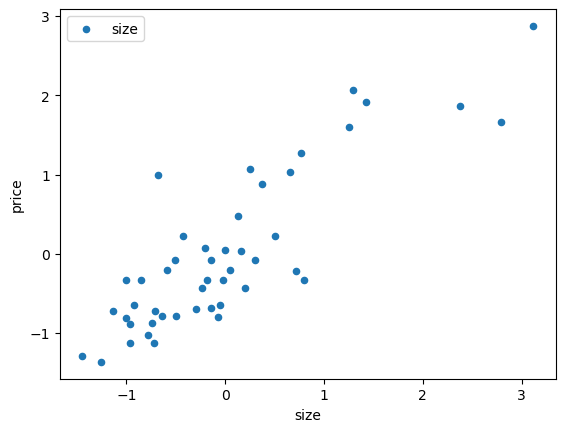

In [6]:
data.plot.scatter('size','price',label='size')
plt.show()

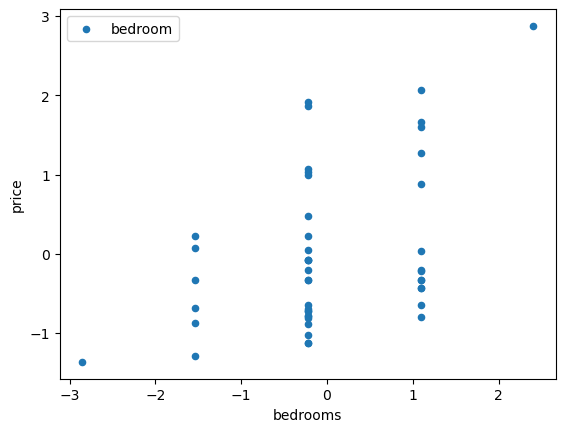

In [7]:
data.plot.scatter('bedrooms','price',label='bedroom')
plt.show()

In [8]:
data.insert(0,'ones',1)
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [9]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [10]:
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [11]:
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [12]:
X=X.values

In [13]:
X.shape

(47, 3)

In [14]:
y=y.values

In [15]:
y=y.reshape(47,1)

In [16]:
y.shape

(47, 1)

In [17]:
def costFunction(X,y,theta):
    inner=np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(X))

In [18]:
theta=np.zeros((3,1))

In [19]:
cost_init=costFunction(X,y,theta)

In [20]:
print(cost_init)

0.48936170212765967


In [21]:
def gradientDescent(X,y,theta,alpha,iters):
    costs=[]
    
    for i in range(iters):
        theta=theta-alpha*(X.T@(X@theta-y))/len(X)
        cost=costFunction(X,y,theta)
        costs.append(cost)
        

    return theta,costs

In [22]:
alpha=[0.0003,0.003,0.03,0.0001,0.001,0.01]
iters=2000

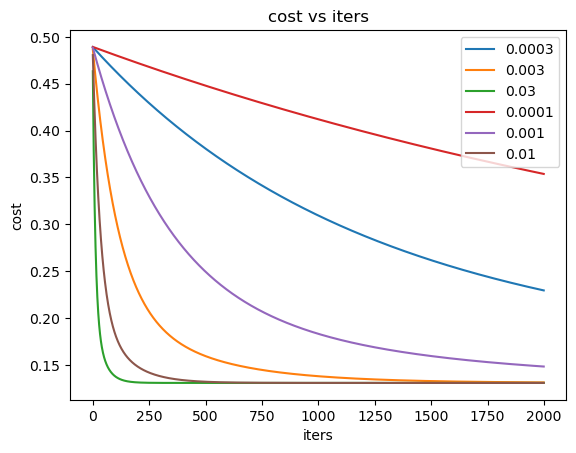

In [23]:
fig,ax=plt.subplots()

for each in alpha:
    _,costs=gradientDescent(X,y,theta,each,iters)
    ax.plot(np.arange(iters),costs,label=each)
    ax.legend()
    
ax.set(xlabel='iters',ylabel='cost',title='cost vs iters')
plt.show()

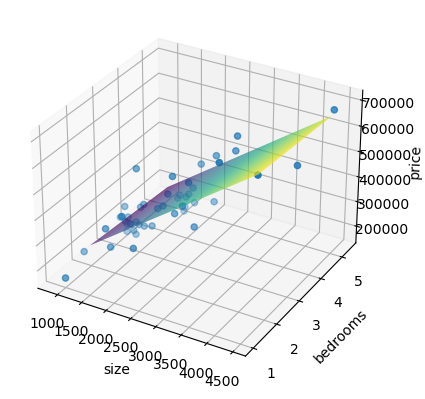

In [24]:
x=np.linspace(y.min(),y.max(),100)
x_s=x
x_b=x
x_s,x_b=np.meshgrid(x_s,x_b)
y_=_[0,0]+_[1,0]*x_s+_[2,0]*x_b

y_=y_*(data_2.iloc[:,2].std())+(data_2.iloc[:,2].mean())
x_s=x_s*(data_2.iloc[:,0].std())+(data_2.iloc[:,0].mean())
x_b=x_b*(data_2.iloc[:,1].std())+(data_2.iloc[:,1].mean())

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data_2.iloc[:,0],data_2.iloc[:,1],data_2.iloc[:,2])
ax.plot_surface(x_s, x_b, y_, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()